# Libraries

In [ ]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np
import warnings
import os
import plotly.express as px
import zipfile
from google.colab import files

# 📊 Visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

# 🔧 Basic functions
def snake_columns(data):
    """
    Standarize and returns snake_case columns
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]

#00 | Data Extraction

In [ ]:
os.listdir()

['.config', 'archive (9).zip', 'sample_data']

In [ ]:
data = pd.read_csv('archive (9).zip')

In [ ]:
df = data.copy() # Making security copy

# 01 | About Dataset

[Kaggle link](https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe/data)  

**Columns:**
- `Date`: The date of the sale.
- `Day`: The day of the month when the sale occurred.
- `Month`: The month when the sale occurred.
- `Year`: The year when the sale occurred.
- `Customer_Age`: Age of the customer.
- `Age_Group`: Age group classification of the customer.
- `Customer_Gender`: Gender of the customer.
- `Country`: Country where the sale took place.
- `State`: State where the sale took place.
- `Product_Category`: Category of the product sold.
- `Sub_Category`: Sub-category of the product sold.
- `Product`: Specific product sold.
- `Order_Quantity`: Number of units ordered.
- `Unit_Cost`: Cost per unit of the product.
- `Unit_Price`: Selling price per unit of the product.
- `Profit`: Profit from the sale.
- `Cost`: Total cost of the sale.
- `Revenue`: Total revenue from the sale.

**Problem Statement**

**Business Analyst Case:** A bike shop has been gathering data from 2011-2016 and now wants to gain insights and understand historical performance to improve the business. The objective is to use this data to predict future demand and profits, which are key for making informed business decisions.


In [ ]:
df.head()

,customer_age,customer_gender,country,product_category,order_quantity,unit_cost,unit_price,profit,cost,revenue
date,,,,,,,,,,
2013-11-26,19,0,2,0,8,45,120,600,360,960
2015-11-26,19,0,2,0,8,45,120,600,360,960
2014-03-23,49,0,1,0,23,45,120,1725,1035,2760
2016-03-23,49,0,1,0,20,45,120,1500,900,2400
2014-05-15,47,1,1,0,4,45,120,300,180,480


# 02 | Data Exploration

In [ ]:
rows, columns = df.shape

In [ ]:
print(f'Number of Rows: {rows}')
print(f'Number of Columns: {columns}')

Number of Rows: 113036
Number of Columns: 18


In [ ]:
df.dtypes # 50/50 distribution numerical-categoricals

,0
Date,object
Day,int64
Month,object
Year,int64
Customer_Age,int64
Age_Group,object
Customer_Gender,object
Country,object
State,object
Product_Category,object


# 03 | Data Cleaning for ML

In [ ]:
# Cleaning columns in snake_format:
snake_columns(df)

## Duplicates

In [ ]:
# Checking duplicates:
df.duplicated().sum()

1000

In [ ]:
# Dropping duplicates:
df = df.drop_duplicates()

In [ ]:
# Checking we now have 0 duplicates:
df.duplicated().sum()

0

## Null Values

In [ ]:
df.isna().sum() # We have no null values

,0
date,0
day,0
month,0
year,0
customer_age,0
age_group,0
customer_gender,0
country,0
state,0
product_category,0


In [ ]:
df.eq(" ").sum() # No empty values

,0
date,0
day,0
month,0
year,0
customer_age,0
age_group,0
customer_gender,0
country,0
state,0
product_category,0


## Dates cleaning

In [ ]:
# Change date to dateime so it is numerical
df.date = pd.to_datetime(df.date)

In [ ]:
# Drop other date-related columns as date contains all info:
df = df.drop(columns=['day', 'month', 'year'])

## Revenue / Cost / Profit fixing

After revieiwng some rows I realised that some of the sales numbers are not correct, thus I'll be fixing the sales columns based on the following principles:

* `cost` = `order_quantity` * `unit_cost`
* `revenue` = `order_quantity` * `unit_price`
* `profit` = `revenue` - `cost`

In [ ]:
# Correct the cost, revenue, and profit columns
df['cost'] = df['order_quantity'] * df['unit_cost']
df['revenue'] = df['order_quantity'] * df['unit_price']
df['profit'] = df['revenue'] - df['cost']

## `Categoricals` to `Numericals`

Fixing Customer related columns

In [ ]:
# Dropping [age_group] as we already have age:
df = df.drop(columns=['age_group'])

In [ ]:
# Mapping gender M/F to 0-1:
gender_map = {'M':0, 'F':1}
# Applying gender mapping:
df.customer_gender = df.customer_gender.map(gender_map)

In [ ]:
df.head()

,date,customer_age,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,2013-11-26,19,0,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960
1,2015-11-26,19,0,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960
2,2014-03-23,49,0,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1725,1035,2760
3,2016-03-23,49,0,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1500,900,2400
4,2014-05-15,47,1,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,300,180,480


Mapping countries and dropping states:

In [ ]:
# Define the mapping dictionary
country_map = {
    'United States': 0,
    'Australia': 1,
    'Canada': 2,
    'United Kingdom': 3,
    'Germany': 4,
    'France': 5
}

# Apply the country mapping
df.country = df['country'].map(country_map)

In [ ]:
# Droping state as it has 53 unique values so too much:
df = df.drop(columns=['state'])

Fixing `product_related` columns:

In [ ]:
# Mapping product categories as we only have 3 types:
product_cat_map = {'Accessories': 0, 'Bikes': 1, 'Clothing': 3}
# Apply mapping:
df.product_category = df.product_category.map(product_cat_map)

In [ ]:
df.sub_category.nunique()

17

Removing `sub_category` and `product` columns to focus only in top level product categories:

In [ ]:
df = df.drop(columns=['sub_category', 'product'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112036 entries, 0 to 113035
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              112036 non-null  datetime64[ns]
 1   customer_age      112036 non-null  int64         
 2   customer_gender   112036 non-null  int64         
 3   country           112036 non-null  int64         
 4   product_category  112036 non-null  int64         
 5   order_quantity    112036 non-null  int64         
 6   unit_cost         112036 non-null  int64         
 7   unit_price        112036 non-null  int64         
 8   profit            112036 non-null  int64         
 9   cost              112036 non-null  int64         
 10  revenue           112036 non-null  int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 10.3 MB


## Grouping Monthly Data

We are going to predict data grouped monthly to see demand (`order_quantity`) trends by month:

In [ ]:
# Setting date as index:
df.set_index('date', inplace=True)

In [ ]:
# Data grouped monthly by product category:
weekly_df_product_cat = df.groupby([pd.Grouper(freq='W'), 'product_category']).sum().reset_index()

In [ ]:
weekly_df_product_cat.shape

(491, 11)

# 03 | Data Preprocessing

In [ ]:
# Creating[ml_df] dataset to work on ML:
ml_df = weekly_df_product_cat.copy()

In [ ]:
# Convert 'date' to numeric features
ml_df['year'] = ml_df['date'].dt.year
ml_df['month'] = ml_df['date'].dt.month
ml_df['day'] = ml_df['date'].dt.day

# Drop the original 'date' column
ml_df = ml_df.drop(columns=['date'])

In [ ]:
# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## X-y Split

**Target Column** = `order_quantity` (acting as 'demand')

In [ ]:
# Define features and target
X = ml_df.drop(columns=['order_quantity'])
y = ml_df['order_quantity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 112036.
70% for training data: 294.
30% for test data: 197.


## Linear Regression

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Make predictions on the test dataset
predictions = model.predict(X_test)

### Metrics

In [ ]:
r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

In [ ]:
#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.998
RMSE =  157.4079
MSE =   24777.2445
MAE =  123.6006


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

features = model.coef_
_ = pd.Series(features, index=X.columns).abs().sort_values(ascending=False)

_[:5]

,0
product_category,110.332693
year,32.720009
month,10.220495
customer_gender,5.098365
country,0.886256


## Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
predictions_ridge = ridge.predict(X_test)

### Metrics

In [ ]:
r2_3_2 = r2_score(y_test, predictions_ridge)
RMSE_3_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_ridge)
MAE_3_2 = mean_absolute_error(y_test, predictions_ridge)

In [ ]:
#Printing the results
print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("The value of the metric MSE is ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.998
RMSE =  157.3975
The value of the metric MSE is  24773.9834
MAE =  123.5911


## Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
predictions_lasso = lasso.predict(X_test)

### Metrics

In [ ]:
r2_3_3 = r2_score(y_test, predictions_lasso)
RMSE_3_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_3_3 = mean_squared_error(y_test, predictions_lasso)
MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)

In [ ]:
#Printing the results
print("R2 = ", round(r2_3_3, 4))
print("RMSE = ", round(RMSE_3_3, 4))
print("The value of the metric MSE is ", round(MSE_3_3, 4))
print("MAE = ", round(MAE_3_3, 4))

R2 =  0.998
RMSE =  149.6445
The value of the metric MSE is  22393.4842
MAE =  120.0384


In [ ]:
eval_df = pd.DataFrame({"actual":y_test,"pred":predictions})

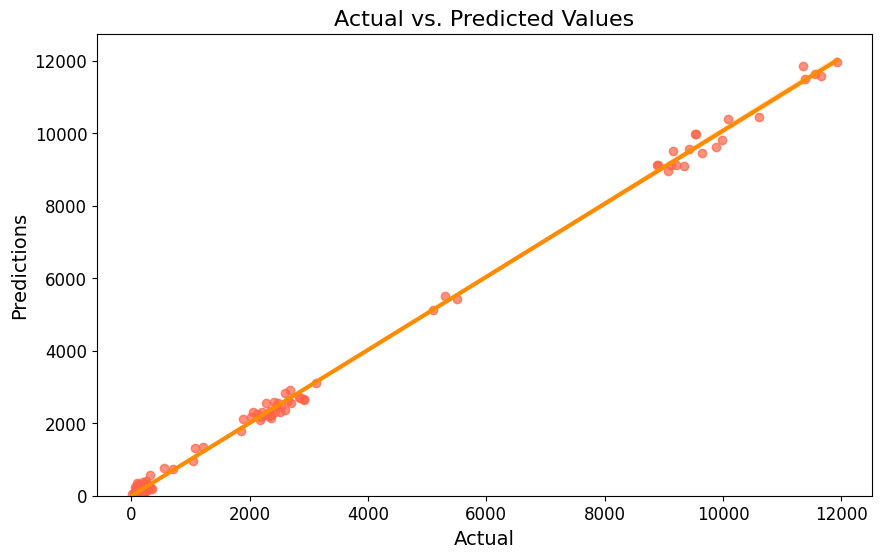

In [ ]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()